### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [ ]:
# Importing tensorflow
# Using random seed for reproducibility.

import tensorflow as tf  
tf.set_random_seed(42)

In [ ]:
#Veryfying which version of  the tensorflow is currently running. 

tf.__version__ 

'1.15.0'

### Collect Data

In [ ]:
#Importing keras.

import keras 

Using TensorFlow backend.


In [ ]:
#MNIST dataset is one of the most commonly used dataset for image classification. 
#Tensorflow and keras allows a user to import and download data directly from their API.
# MNIST: Contains 60,000 training images and 10,000 testing images.
#Taken from American Census bureau employees and American High school.

(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print(testY[0:5])

[9 2 1 1 6]


In [ ]:
import pandas as pd

In [ ]:
classes= ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
classes=pd.Series(classes)

In [ ]:
classes

0    T-shirt/top
1        Trouser
2       Pullover
3          Dress
4           Coat
5         Sandal
6          Shirt
7        Sneaker
8            Bag
9     Ankle boot
dtype: object

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

Uint8 data type contains all whole numbers from 0-255. As with all unsigned numbers, the values must be non-negative. Uint8's are mostly used in graphics(colours are always non-negative)

In order to feed the output of to_categorical directly to the model, conversion should not affect much. The array will always be converted to the data type of the model's output tensor when being used in fit. Under normal usage this datatpe will be k.floatx() which is 'float32'  

In [ ]:
trainX.dtype

dtype('uint8')

In [ ]:
# Converting the datatype to 'float32'

trainX=trainX.astype('float32')

In [ ]:
# Verifying the change. 

trainX.dtype

dtype('float32')

In [ ]:
trainY.dtype

dtype('uint8')

In [ ]:
trainY= trainY.astype('float32')

In [ ]:
trainY

array([9., 0., 0., ..., 3., 0., 5.], dtype=float32)

In [ ]:
testX.dtype

dtype('uint8')

In [ ]:
testX= testX.astype('float32')

In [ ]:
testX

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
testY.dtype

dtype('uint8')

In [ ]:
testY=testY.astype('float32')

In [ ]:
testY

array([9., 2., 1., ..., 8., 1., 5.], dtype=float32)

In [ ]:
# Training as well as test labels need to be predicted. 
# Thus, hot encoding will be done on trainY and testY.

trainY= tf.keras.utils.to_categorical(trainY, num_classes= 10)

In [ ]:
testY= tf.keras.utils.to_categorical(testY, num_classes= 10)

In [ ]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


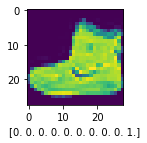

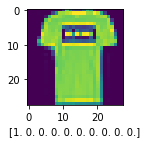

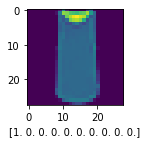

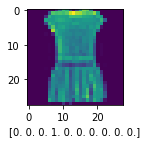

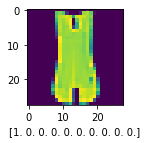

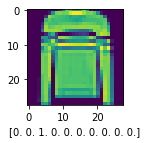

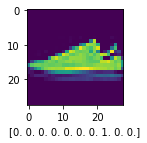

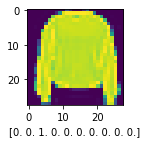

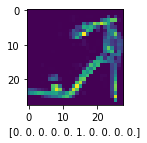

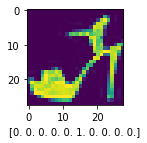

In [ ]:

import matplotlib.pyplot as plt 
i = 0
for i in range(10):
  figure = plt.figure(figsize=(10,10))
  plt.subplot(2,5,i+1)
  plt.imshow(trainX[i])
  plt.xlabel(trainY[i])
  i += 1

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

CREATING THE MODEL. 

In [ ]:
# Importing necessary modules in order to build the model. 

from keras import layers 
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
model = Sequential()
model = Sequential([layers.Flatten(input_shape=(28,28))]) #Flattening the layers. 
model.add(Dense(20, input_dim= 10, activation= 'sigmoid')) #20 neurons, input layer.
model.add(Dense(20, activation= 'sigmoid')) #20 neurons, intermediate layer.
model.add(Dense(10, activation= 'sigmoid')) #10 neuron, output layer.

# Compiling the model. 

model.compile(loss= 'binary_crossentropy', optimizer= 'sgd', metrics= ['accuracy']) #Loss function.

### Execute the model using model.fit()

In [ ]:
# Fitting the model.

model.fit(trainX,trainY, epochs= 10)




Epoch 1/10





60000/60000 [==============================] - 15s 257us/step - loss: 0.3910 - acc: 0.8784
Epoch 2/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.3206 - acc: 0.9000
Epoch 3/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.3167 - acc: 0.9000
Epoch 4/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.3120 - acc: 0.9000
Epoch 5/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.3076 - acc: 0.9000
Epoch 6/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.3032 - acc: 0.9000
Epoch 7/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.2975 - acc: 0.9000
Epoch 8/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.2895 - acc: 0.9000
Epoch 9/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.2819 - acc: 0.9000
Epoch 10/10
60000/60000 [==============================] - 7s 115us/step - loss: 0

THERE IS SIGNIFICANT REDUCTION IN THE LOSS THAT IS SEEN: LOSS DROP FROM 0.39- 0.27 WHILE ASSERTING AN ACCURACY OF 90% THROUGH OUT EPOCHS.

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_20 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


### Execute the model

In [ ]:
y_predict = model.predict(testX)

In [ ]:
# Evaluating Test accuracy and Test loss

test_loss, test_accuracy = model.evaluate(testX, testY, verbose =2)

print('\n Test Accuracy =', test_accuracy)
print('\n Test Loss =', test_loss)


 Test Accuracy = 0.8999999761581421

 Test Loss = 0.2703703638076782


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [ ]:
model.compile(optimizer= keras.optimizers.SGD(lr = 0.001), loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
model.fit(trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.2695 - acc: 0.9000
Epoch 2/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.2687 - acc: 0.9000
Epoch 3/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.2679 - acc: 0.9000
Epoch 4/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.2672 - acc: 0.9000
Epoch 5/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.2665 - acc: 0.9000
Epoch 6/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.2657 - acc: 0.9000
Epoch 7/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.2650 - acc: 0.9000
Epoch 8/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.2643 - acc: 0.9000
Epoch 9/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.2635 - acc: 0.9000
Epoch 10/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.2628 - a

BY CUSTOMIZING THE LEARNING RATE, THERE HAS BEEN FURTHER REDUCTION IN LOSS BUT IT IS NOT VERY SIGNIFICANT. REDUCED FROM 0.27- 026 ONLY.

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_20 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [ ]:
# Building and compiling the model.

model01 = Sequential([layers.Flatten(input_shape=(28,28))]) #Flattening the layers.
model01.add(Dense(100, input_dim= 8, activation= 'sigmoid')) #Input layer: 100 neurons.
model01.add(Dense(100, activation= 'sigmoid')) #Intermediate layer: 100 neurons.
model01.add(Dense(10, activation= 'softmax')) #Output layer: 10 neurons. 
model01.compile(optimizer= keras.optimizers.SGD(lr= 0.003), loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
# Fitting the model. 

model01.fit( trainX, trainY, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.3178 - acc: 0.9000
Epoch 2/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.2965 - acc: 0.9000
Epoch 3/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.2835 - acc: 0.9000
Epoch 4/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.2721 - acc: 0.9000
Epoch 5/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.2612 - acc: 0.9000
Epoch 6/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.2508 - acc: 0.9000
Epoch 7/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.2412 - acc: 0.9000
Epoch 8/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.2323 - acc: 0.9000
Epoch 9/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.2241 - acc: 0.9000
Epoch 10/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.2163 - a

## Review model

1) THERE HAS BEEN SIGNIFICANT REDUCTION IN LOSS: DROPPED FROM 0.31-0.21 WHILE ASSERTING AN ACCURACY OF 90% THROUGH OUT THE EPOCHS. 

2) TUNING THE HYPERPARAMETERS AND TWEAKING THE LEARNING RATE HAS HELPED THE MODEL ACHEIVE THIS.  

### Run the model

In [ ]:
# Reviewing Test accuracy and Test loss.

Prediction = model.predict(testX)

In [ ]:
Test_loss, Test_accuracy= model01.evaluate(testX, testY)
print("Test loss is {}%.".format(Test_loss * 100))
print("Test accuracy acheived is {}%.".format(Test_accuracy * 100))

10000/10000 [==============================] - 1s 60us/step
Test loss is 21.32429971218109%.
Test accuracy acheived is 89.99999761581421%.
